# Projet de Machine Learning 
## Gym Members Exercise Dataset
### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman
(Notebook Python)

#### **I.Pre-proccessing des données**

On va ici sans entrer dans le détail faire la même chose que les parties I.1, I.2 et I.3 du notebook R afin de préparer nos données.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path="./gym_members_exercise_tracking.csv"
gym=pd.read_csv(path,sep=",",header=0)
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [31]:
gym["Gender"]=pd.Categorical(gym["Gender"],ordered=False)
gym["Workout_Type"]=pd.Categorical(gym["Workout_Type"],ordered=False)
gym["Experience_Level"]=pd.Categorical(gym["Experience_Level"],ordered=True)
gym.dtypes

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)       int64
Experience_Level                 category
BMI                               float64
dtype: object

In [32]:
gym["LWeight"]=gym["Weight (kg)"].map(lambda x:np.log(x))
gym["LBMI"]=gym["BMI"].map(lambda x:np.log(x))
#gym["LWater_Intake"]=gym["Water_Intake (liters)"].map(lambda x:np.log(x))
#gym["Fat_Percentage_S"]=gym["Fat_Percentage"].map(lambda x:x**2/100)
#gym["SHeight"]=gym["Height (m)"].map(lambda x:np.sqrt(x))
del gym["Weight (kg)"]
del gym["BMI"]
#del gym["Water_Intake (liters)"]
#del gym["Fat_Percentage"]
#del gym["Height (m)"]
gym.head()

,Age,Gender,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,LWeight,LBMI
0,56,Male,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,4.480740,3.407842
1,46,Female,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,4.316154,3.465736
2,32,Female,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,4.220977,3.207208
3,25,Male,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,3.974058,2.912894
4,38,Male,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,3.830813,2.666534


In [33]:
print(gym.isnull().sum())

Age                              0
Gender                           0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
LWeight                          0
LBMI                             0
dtype: int64


Il n'y a aucune valeur manquante dans le jeu de données.

# **II.Prédiction des calories brûlées (Régression)**

Nous souhaitons prédire le nombre de calories brulées, nous comparons donc différentes méthodes de régression afin de s'assurer une prédiction fiable.

In [34]:
from sklearn.preprocessing import StandardScaler  
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Calories_Burned"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

> Utiliser l'échantillon d'apprentissage pour l'entraîner est nécessaire, afin de pouvoir évaluer le modèle sur le reste des données sans avoir un biais au niveau de l'estimation de l'erreur de généralisation (l'estimateur est trop optimiste).

**Régression Linéaire Totale**

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector

In [81]:
reglin=LinearRegression().fit(X_train,Y_train)
reglinpred=reglin.predict(X_test)
reglin_coeff = pd.DataFrame(columns=X.columns)
reglin_coeff.loc[1]=reglin.coef_
reglin_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level_1,Experience_Level_2,Experience_Level_3,Age,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),LWeight,LBMI
1,-40.616945,40.616945,4.300074,-0.613634,0.854746,-4.541186,5.393996,3.487243,-8.881239,-3.303993,48.236338,0.117404,6.154324,0.608697,713.889762,-1.024192,-2.42287,4.03075,-24.770089,31.892252


In [84]:
MSE_RLt = mean_squared_error(reglinpred,Y_test)
R2_RLt = r2_score(reglinpred,Y_test)
PrevError_RLt = 1 - reglin.score(X_train, Y_train)
print("MSE=",MSE_RLt)
print("R2=",R2_RLt)
print("Prevision Error= ", PrevError_RLt)

MSE= 1674.4201880746139
R2= 0.9794455159771283
Prevision Error=  0.02114616212104059


> On voit qu'on a un score du R2 vraiment proche de 1 ce qui signifie que les prédictions sont assez proche des vraies valeurs. C'est un résultat étonnament bon pour un modèle linéaire surtout avec l'entiereté des variables explicatives.

**Régression Linéaire avec forward selection**

In [71]:
def compute_aic(n, mse, k):
    return n * math.log(mse) + 2 * k

sfs_lin = SequentialFeatureSelector(LinearRegression(), direction="forward", cv=5)
sfs_lin.fit(Xr_train, Y_train)
X_forward_train=sfs_lin.transform(Xr_train)
X_forward_test=sfs_lin.transform(Xr_test)
selected_features = X.columns[sfs_lin.get_support()]
print("Variables sélectionnées :", selected_features)
reglin_forward=LinearRegression().fit(X_forward_train,Y_train)
reglin_forward_pred=reglin_forward.predict(X_forward_test)

Variables sélectionnées : Index(['Gender_Female', 'Gender_Male', 'Workout_Type_Cardio', 'Age', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'LWeight'],
      dtype='object')


In [72]:
reglin_forward_coeff = pd.DataFrame(columns=selected_features)
reglin_forward_coeff.loc[1]=reglin_forward.coef_
reglin_forward_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Age,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),LWeight
1,-21.270419,21.270419,2.335128,-40.011499,88.53477,4.55536,240.466199,-3.777115,-1.999065,2.252122


In [78]:
MSE_RLfs = mean_squared_error(reglin_forward_pred,Y_test)
R2_RLfs = r2_score(reglin_forward_pred,Y_test)
PrevError_RLfs = 1 - reglin_forward.score(X_forward_train, Y_train)
print("MSE=",MSE_RLfs)
print("R2=", R2_RLfs)
print("Prevision Error=",PrevError_RLfs)

MSE= 1637.5141864739314
R2= 0.9799270602788545
Prevision Error= 0.021325920448082902


> On a ici utilisé un algorithme de forward selection pour choisir les variables explicatives. On voit qu'on a supprimé quelques variables par rapport au modèle linéaire total. Les résultats sont satisfaisant et dans le même ordre de grandeur que le modèle précédant (résultat légèrement meilleurs ici).

**Régression Lasso**

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
param=[{"alpha":[0.05]+[0.1*i for i in range(1,9)]+[1,2]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977534, Meilleur paramètre = {'alpha': 0.8}


In [76]:
prev=regLassOpt.predict(Xr_test)
MSE_RLasso = mean_squared_error(prev,Y_test)
R2_RLasso = r2_score(Y_test,prev)
PrevError_RLasso = 1 - regLassOpt.score(Xr_train, Y_train)
print("MSE=",MSE_RLasso)
print("R2=",R2_RLasso)
print(f"Erreur de prévision: {PrevError_RLasso}")

MSE= 1640.7167506205885
R2= 0.9803330387013541
Erreur de prévision: 0.021305399789747548


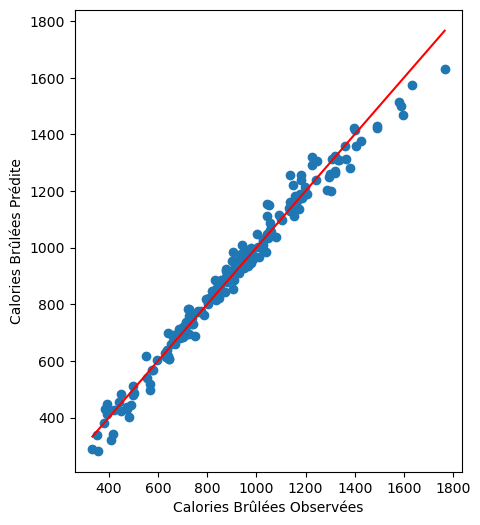

In [43]:
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,prev,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédite")
plt.show()

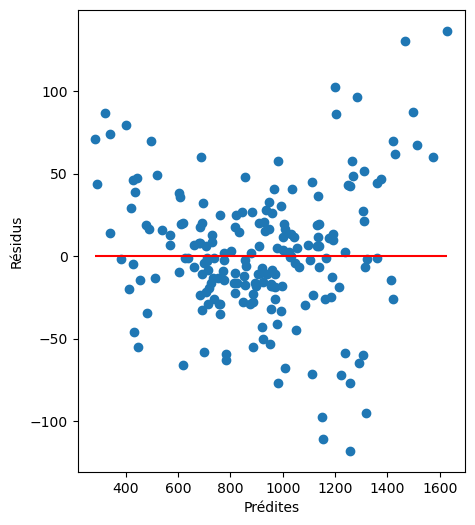

In [44]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(prev),max(prev),"r")
plt.show()

Lasso conserve 14 variables et en supprime 6


Text(0.5, 1.0, 'Coefficients du modèle lasso')

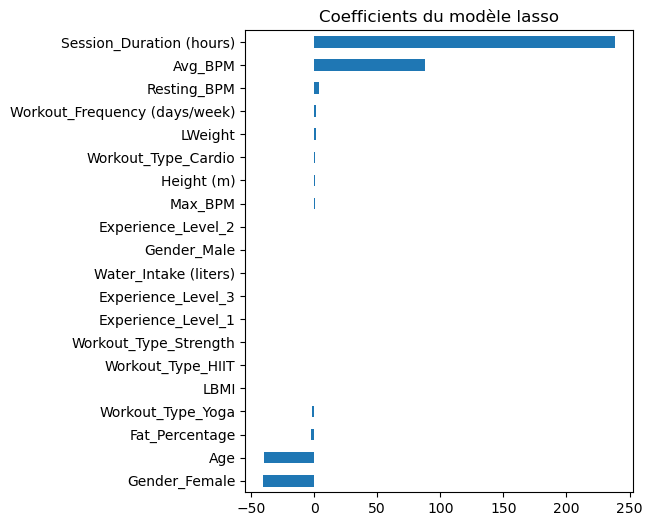

In [45]:
regLasso=Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + " variables et en supprime " +  str(sum(coef == 0)))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (5.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

> On a utilisé ici la pénalisation Lasso pour faire la sélection de variables. On conserve avec ce modèle un peu plus de variables explicatives qu'avec la forward selection mais on obtient des résultats de performance très similaires.

## SVR

In [46]:
from sklearn.svm import SVR
param={"C":np.arange(5,100,5), "epsilon":np.arange(0.01,0.5,0.05)}
svm = GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

print(svmOpt.best_params_)

Meilleur score = 0.035629, Meilleur paramètre = {'C': 95, 'epsilon': 0.01}
{'C': 95, 'epsilon': 0.01}


In [47]:
# erreur de prévision sur le test
PrevError_SVR = 1-svmOpt.score(Xr_test,Y_test)
PrevError_SVR

0.03688844590124607

Fin de la séance ici, valeurs a vérifier (eps)

## Arbres

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

On recherche l'arbre optimal, pour cela on choisit d'optimiser sa profondeur, le nombre minimal d'échantillons pour diviser un noeud et le nombre minimal d'échantillon par feuille.

In [49]:
# Optimisation d'hyperparamètres
param=[{"max_depth":list(range(2,12)),"min_samples_split":list(range(2,10)),"min_samples_leaf":list(range(2,10))}]

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.066686, Meilleur paramètre = {'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 6}


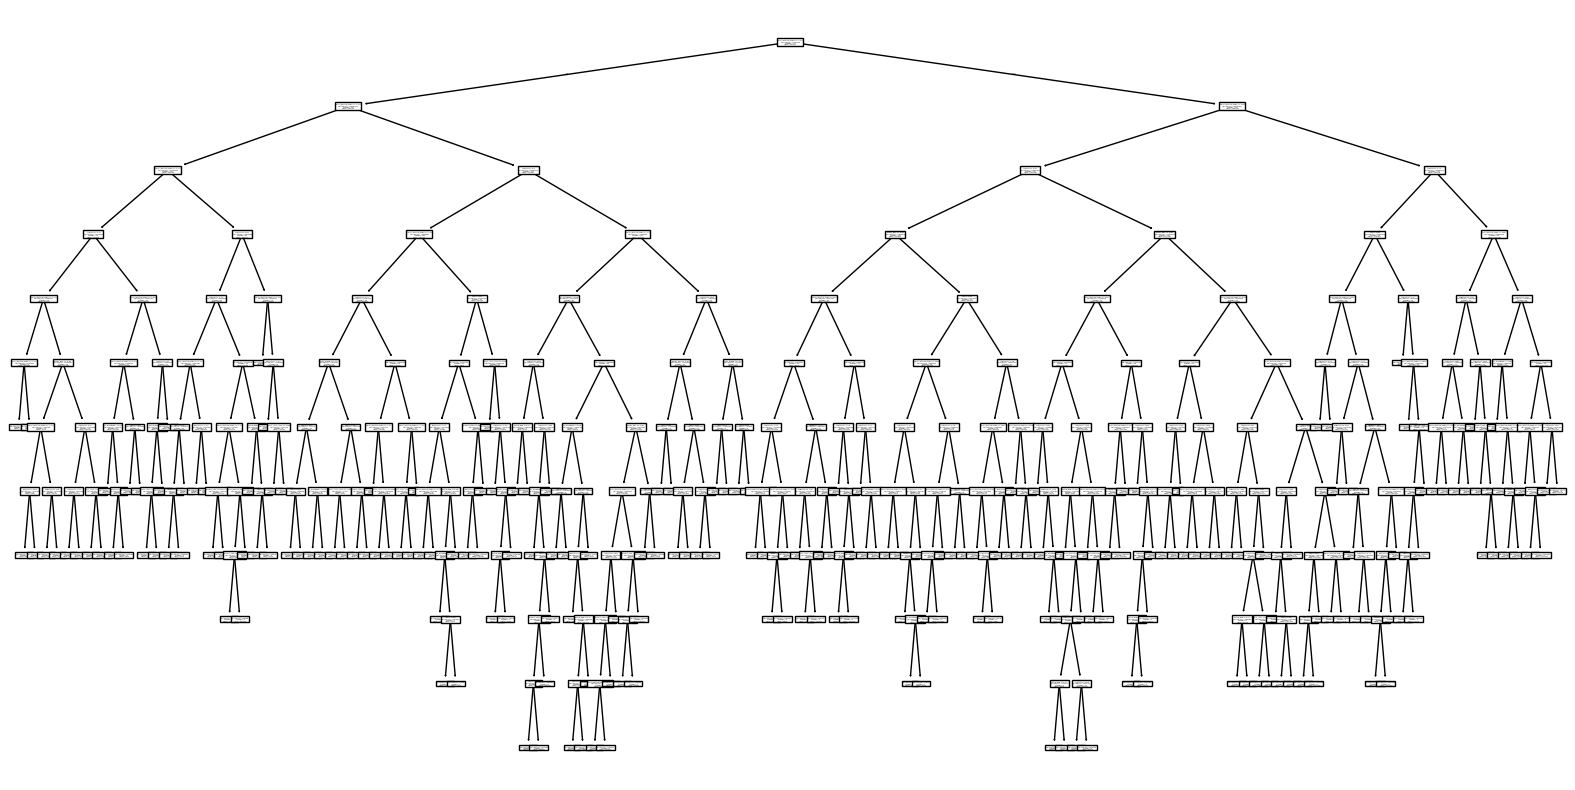

In [50]:
# prévision de l'échantillon test avec le'arbre optimal
bestTree=treeOpt.best_estimator_
Y_hat = bestTree.predict(Xr_test)

plt.figure(figsize=(20,10))
plot_tree(bestTree,feature_names= X.columns.tolist());
plt.show()

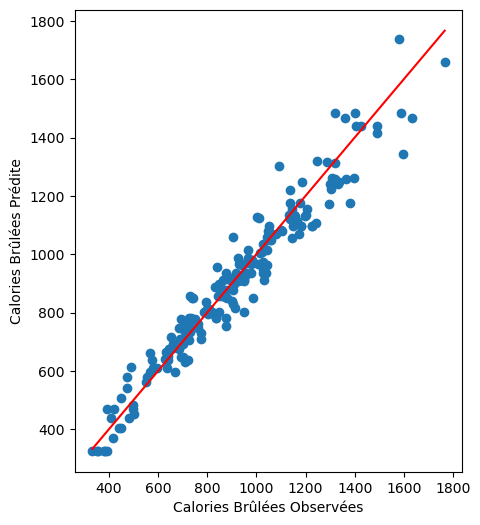

In [51]:
#visualisation des predictions

p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,Y_hat,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédite")
plt.show()

Plus le nombre de calories brûlées observées est élevé, plus les points ont tendance à s'éloigner de la droite y=x. On constate donc qu'avec un arbre on a plus de mal à obtenir une prédiction précise lorsque le nombre de calories brulées est elevée.

In [52]:
# Estimation des erreurs
MSE_TREE = mean_squared_error(Y_hat,Y_test)
R2_TREE = r2_score(Y_test,Y_hat)
PrevError_TREE = 1-treeOpt.score(Xr_test,Y_test)
print(f"Erreur de prévision: {PrevError_TREE}")
print("MSE=",MSE_TREE)
print("R2=",R2_TREE)

Erreur de prévision: 0.05630634233088627
MSE= 4697.358052706552
R2= 0.9436936576691137


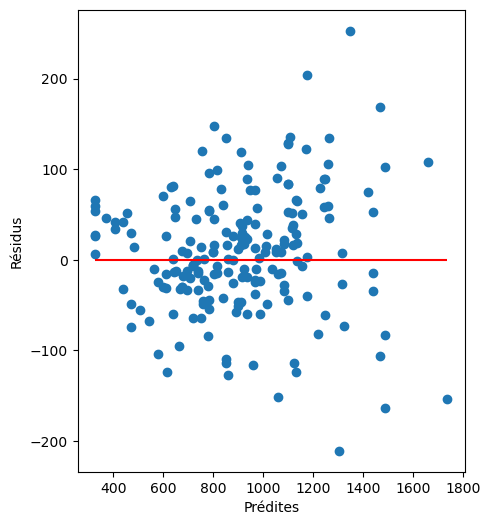

In [53]:
plt.plot(Y_hat,Y_test-Y_hat,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(Y_hat),max(Y_hat),"r")
plt.show()

Comme évoqué précédement, on constate également avec le graph des résidus que le modèle a plus difficulté à donner une prédiction précise lorsque le nombre de calories brûlées est élevé. Les résidus sont centrés autour de 0, il n'ay a donc pas de sur ou sous estimation des calories. 

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
#Recherche des hyperparamètres optimaux (attetntion prend du temps à run)

param=[{"max_features":list(range(5,15,1))+["sqrt"]+["log2"],"max_depth":list(range(5,13,1)),"min_samples_split":list(range(2,7,1)),"min_samples_leaf":list(range(2,7,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100,bootstrap=True, oob_score=True),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))


Meilleur score = 0.029945, Meilleurs paramètres = {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [55]:
# définition des paramètres (on reprend les paramètre optimaux trouvés, si la cellule précédente met trop de temps à tournervous pouvez la sauter)
forest = RandomForestRegressor(n_estimators=500, 
   max_depth=12,
   min_samples_split=4, min_samples_leaf=2, 
   max_features=14, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Y_train)
print(f"Erreur Out-of-Bag: {1-rfFit.oob_score_}")

Erreur Out-of-Bag: 0.026778970477892128


In [56]:
# erreur de prévision sur le test
MSE_RTREE = mean_squared_error(Y_hat,Y_test)
R2_RTREE = r2_score(Y_test,Y_hat)
PrevError_RTREE = 1-rfFit.score(Xr_test,Y_test)
print(f"Erreur de prévision: {PrevError_RTREE}")
print("MSE=",MSE_RTREE)
print("R2=",R2_RTREE)

Erreur de prévision: 0.028372998763523616
MSE= 4697.358052706552
R2= 0.9436936576691137


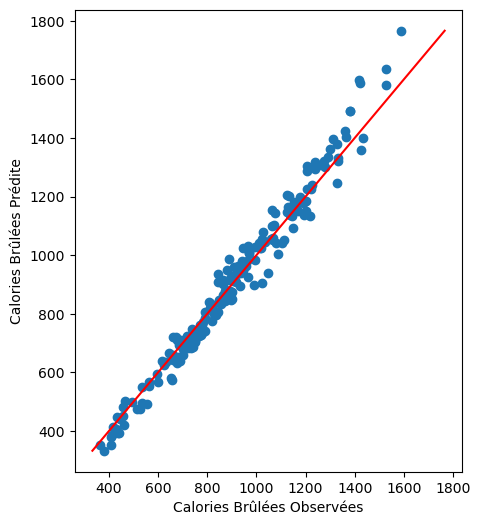

In [57]:
# prévision et visualisation
Y_hat = rfFit.predict(Xr_test)

#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédite")
plt.show()

Session_Duration (hours) 0.6756349962579395
Avg_BPM 0.09776861920212407
Experience_Level_3 0.08294508653944462
Fat_Percentage 0.0630523556671003
Age 0.019442072710461895
Experience_Level_1 0.012402604152397273
Experience_Level_2 0.00983156019068555
Gender_Male 0.005726333662199247
LWeight 0.005561810965616478
Gender_Female 0.0054201961531801955
Height (m) 0.005259933017528202
Water_Intake (liters) 0.004200582915544747
LBMI 0.0036646113241467757
Resting_BPM 0.00324963773626121
Max_BPM 0.0026741902672043467
Workout_Frequency (days/week) 0.0013214980836893477
Workout_Type_Strength 0.0005625306159401059
Workout_Type_Cardio 0.0005198799718452784
Workout_Type_Yoga 0.0003924187865201246
Workout_Type_HIIT 0.00036908178017078166


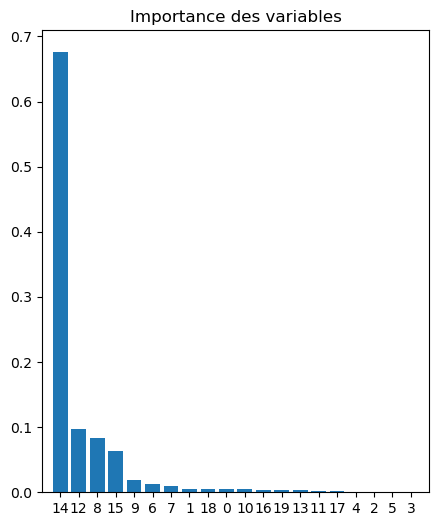

In [58]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(X.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

La variable la plus importante est de loin la durée de la séance, ce qui reste cohérent avec l'analyse exploratoire qui nous montrait que les calories brulées et la durée de la séance sont deux varibles très corélées.

#

## Réseau de Neurones

In [59]:
from sklearn.neural_network import MLPRegressor

On garde la couche d'activation par défaut (relu) car c'est la plus adaptée pour notre étude. On augmente le nombre maximal d'itération car on veut que l'algorithme converge. On veut trouver le nombre de couches cahchées optimal.

In [60]:
param_grid=[{"hidden_layer_sizes":list([(9,),(10,),(11,),(12,),(13,),(14,),(15,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=20000),param_grid,cv=10,n_jobs=-1) 
# entrainement
nnetOpt=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.013839, Meilleur paramètre = {'hidden_layer_sizes': (12,)}


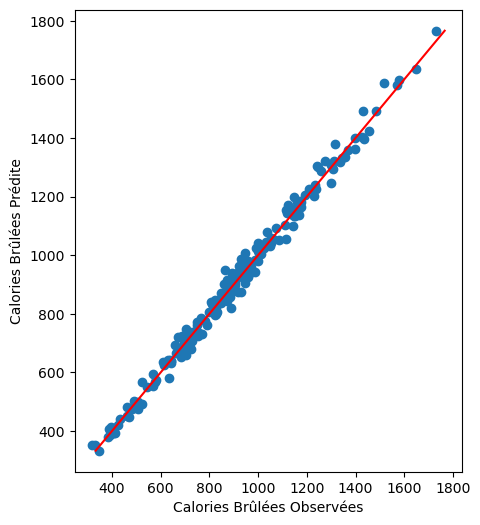

In [61]:
# prévision de l'échantillon test
Y_hat = nnetOpt.predict(Xr_test)

#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédites")
plt.show()

In [63]:
# Estimation de l'erreur de prévision sur le test
MSE_NN = mean_squared_error(Y_hat,Y_test)
R2_NN = r2_score(Y_test,Y_hat)
PrevError_NN = 1-nnetOpt.score(Xr_test,Y_test)
print("Erreur de prévision = %f" % (PrevError_NN))
print("MSE=",MSE_NN)
print("R2=",R2_NN)

Erreur de prévision = 0.008992
MSE= 750.1982546507459
R2= 0.9910075154441208


Sugestions pour la suite : faire un tableau récapitulatif avec toutes les erreurs (et eventuellement les temps de calculs ?) pour chacunes des méthodes pour les comparer.
Faire un mosaic plot pour mettre par exemple tous les graphes de résidus à coté

## Tableau récapitulatif des erreurs

In [90]:
recap = pd.DataFrame({'Erreur de prévision': [PrevError_RLt, PrevError_RLfs, PrevError_RLasso, PrevError_SVR, PrevError_TREE, PrevError_RTREE, PrevError_NN], 'MSE': [MSE_RLt, MSE_RLfs, MSE_RLasso, pd.NA, MSE_TREE, MSE_RTREE, MSE_NN], 'R2': [R2_RLt, R2_RLfs, R2_RLasso, pd.NA, R2_TREE, R2_RTREE, R2_NN]}, index=['RegLinTot','RegLinFSelec', 'RegLasso', 'SVR','Tree','RandomTree', 'NeuralNetwork'])

In [91]:
recap

,Erreur de prévision,MSE,R2
RegLinTot,0.021146,1674.420188,0.979446
RegLinFSelec,0.021326,1637.514186,0.979927
RegLasso,0.021305,1640.716751,0.980333
SVR,0.036888,<NA>,<NA>
Tree,0.056306,4697.358053,0.943694
RandomTree,0.028373,4697.358053,0.943694
NeuralNetwork,0.008992,750.198255,0.991008
